<a href="https://colab.research.google.com/github/inwiitari/CardSort/blob/main/CardSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✨ Превращаем результаты закрытой карточной сортировки в результаты открытой карточной сортировки ✨**

В связи с ограничениями платформы Oprosso на проведение открытой карточной сортировки, выдумываем обходные пути. Если Вам нужно проверить, как пользователи распределяют карточки по группам и при этом чтобы они сами назвали эти группы, добро пожаловать в алгоритм, который поможет Вам преобразовать результаты в то, что Вам нужно.

Для того, чтобы запускать все ячейки с кодом прямо в Google Collab, нажмите Файл - Сохранить копию на Диске, после этого Вы сами сможете подставлять/менять то, что Вам нужно.

Итак, первый шаг - опрос. Используем закрытую карточную сортировку примерно в следующем виде:

*Первый вопрос с инструкцией*

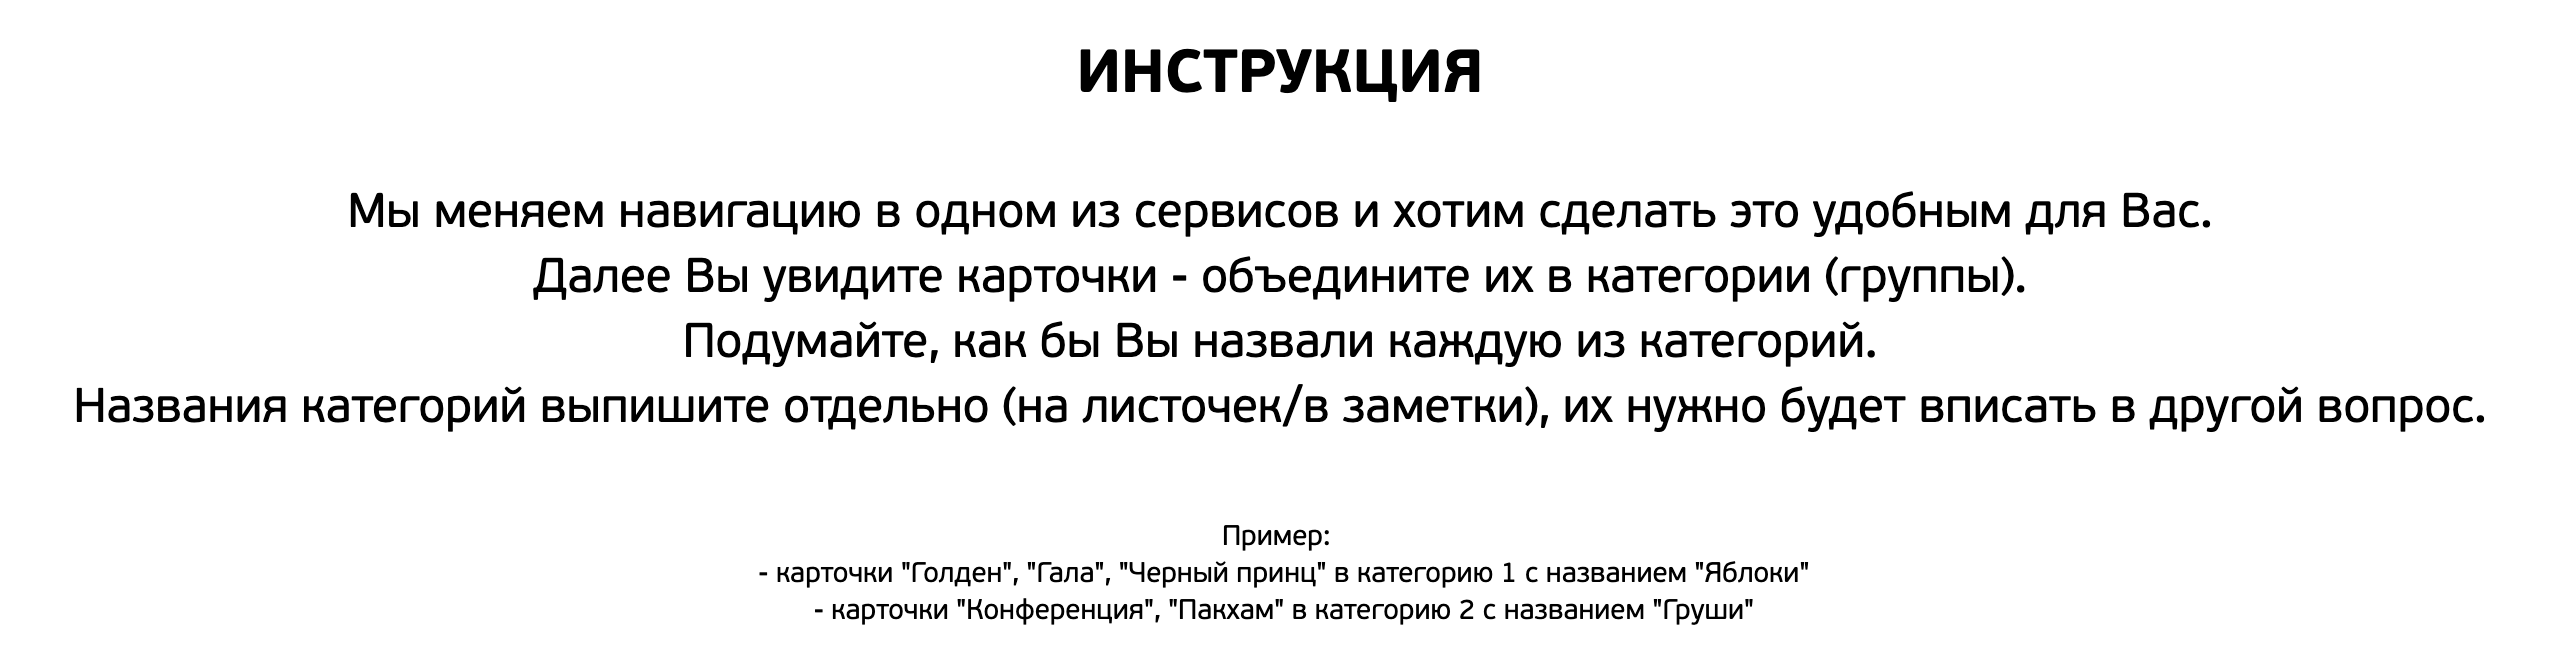

*Второй вопрос с карточками и группами*

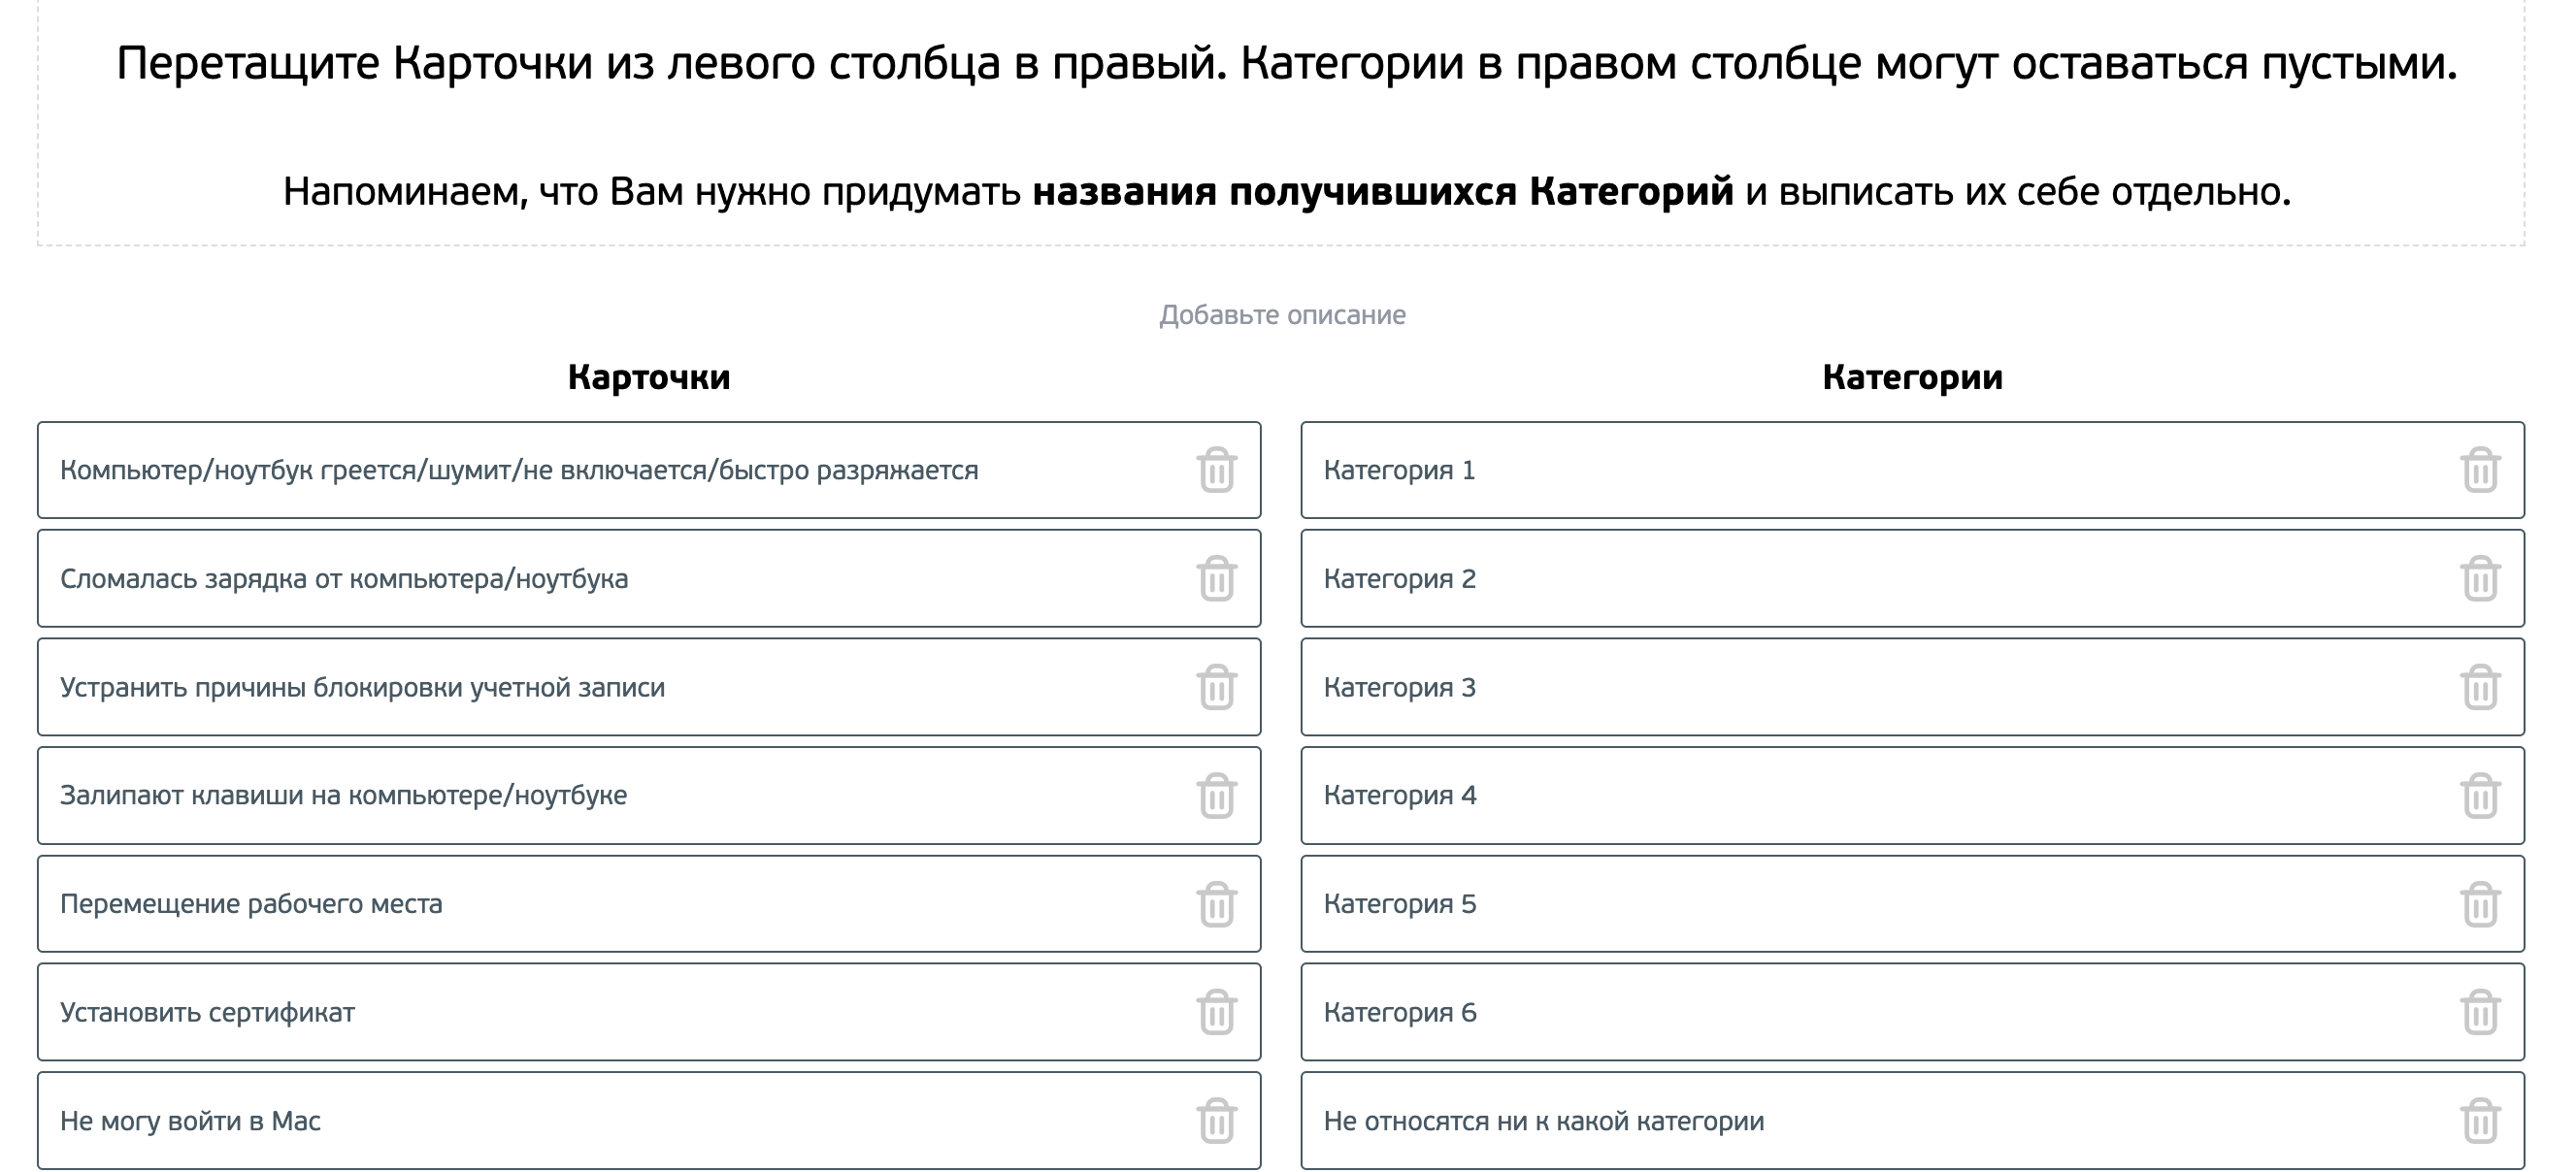

*Третий вопрос с названиями групп*

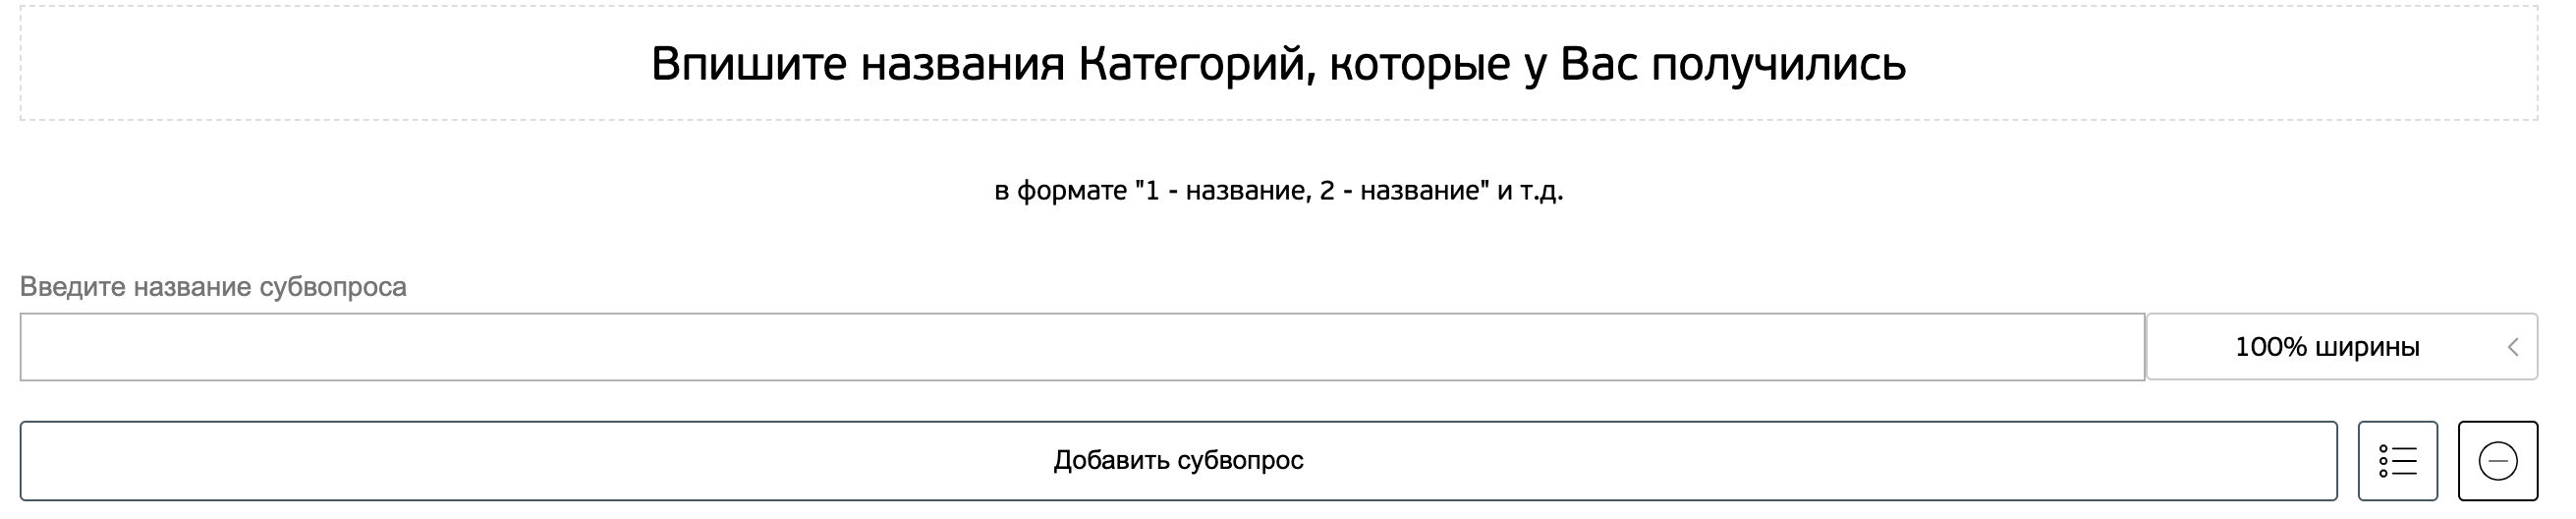

Далее рассылаем опрос, по достижении необходимого количества ответов скачиваем выгрузку с данными. 

# **Подготовка таблицы для анализа**

Из выгрузки делаем отдельную таблицу в формате .xlsx для подсчета результатов, которая должна выглядеть так:

*   Первая строка - названия карточек
*   Первый столбец и далее - распределение карточек в категории
*   Никаких лишних столбцов/строк, в таблице должны быть только названия карточек и распределение по категориям

*Пример таблицы*

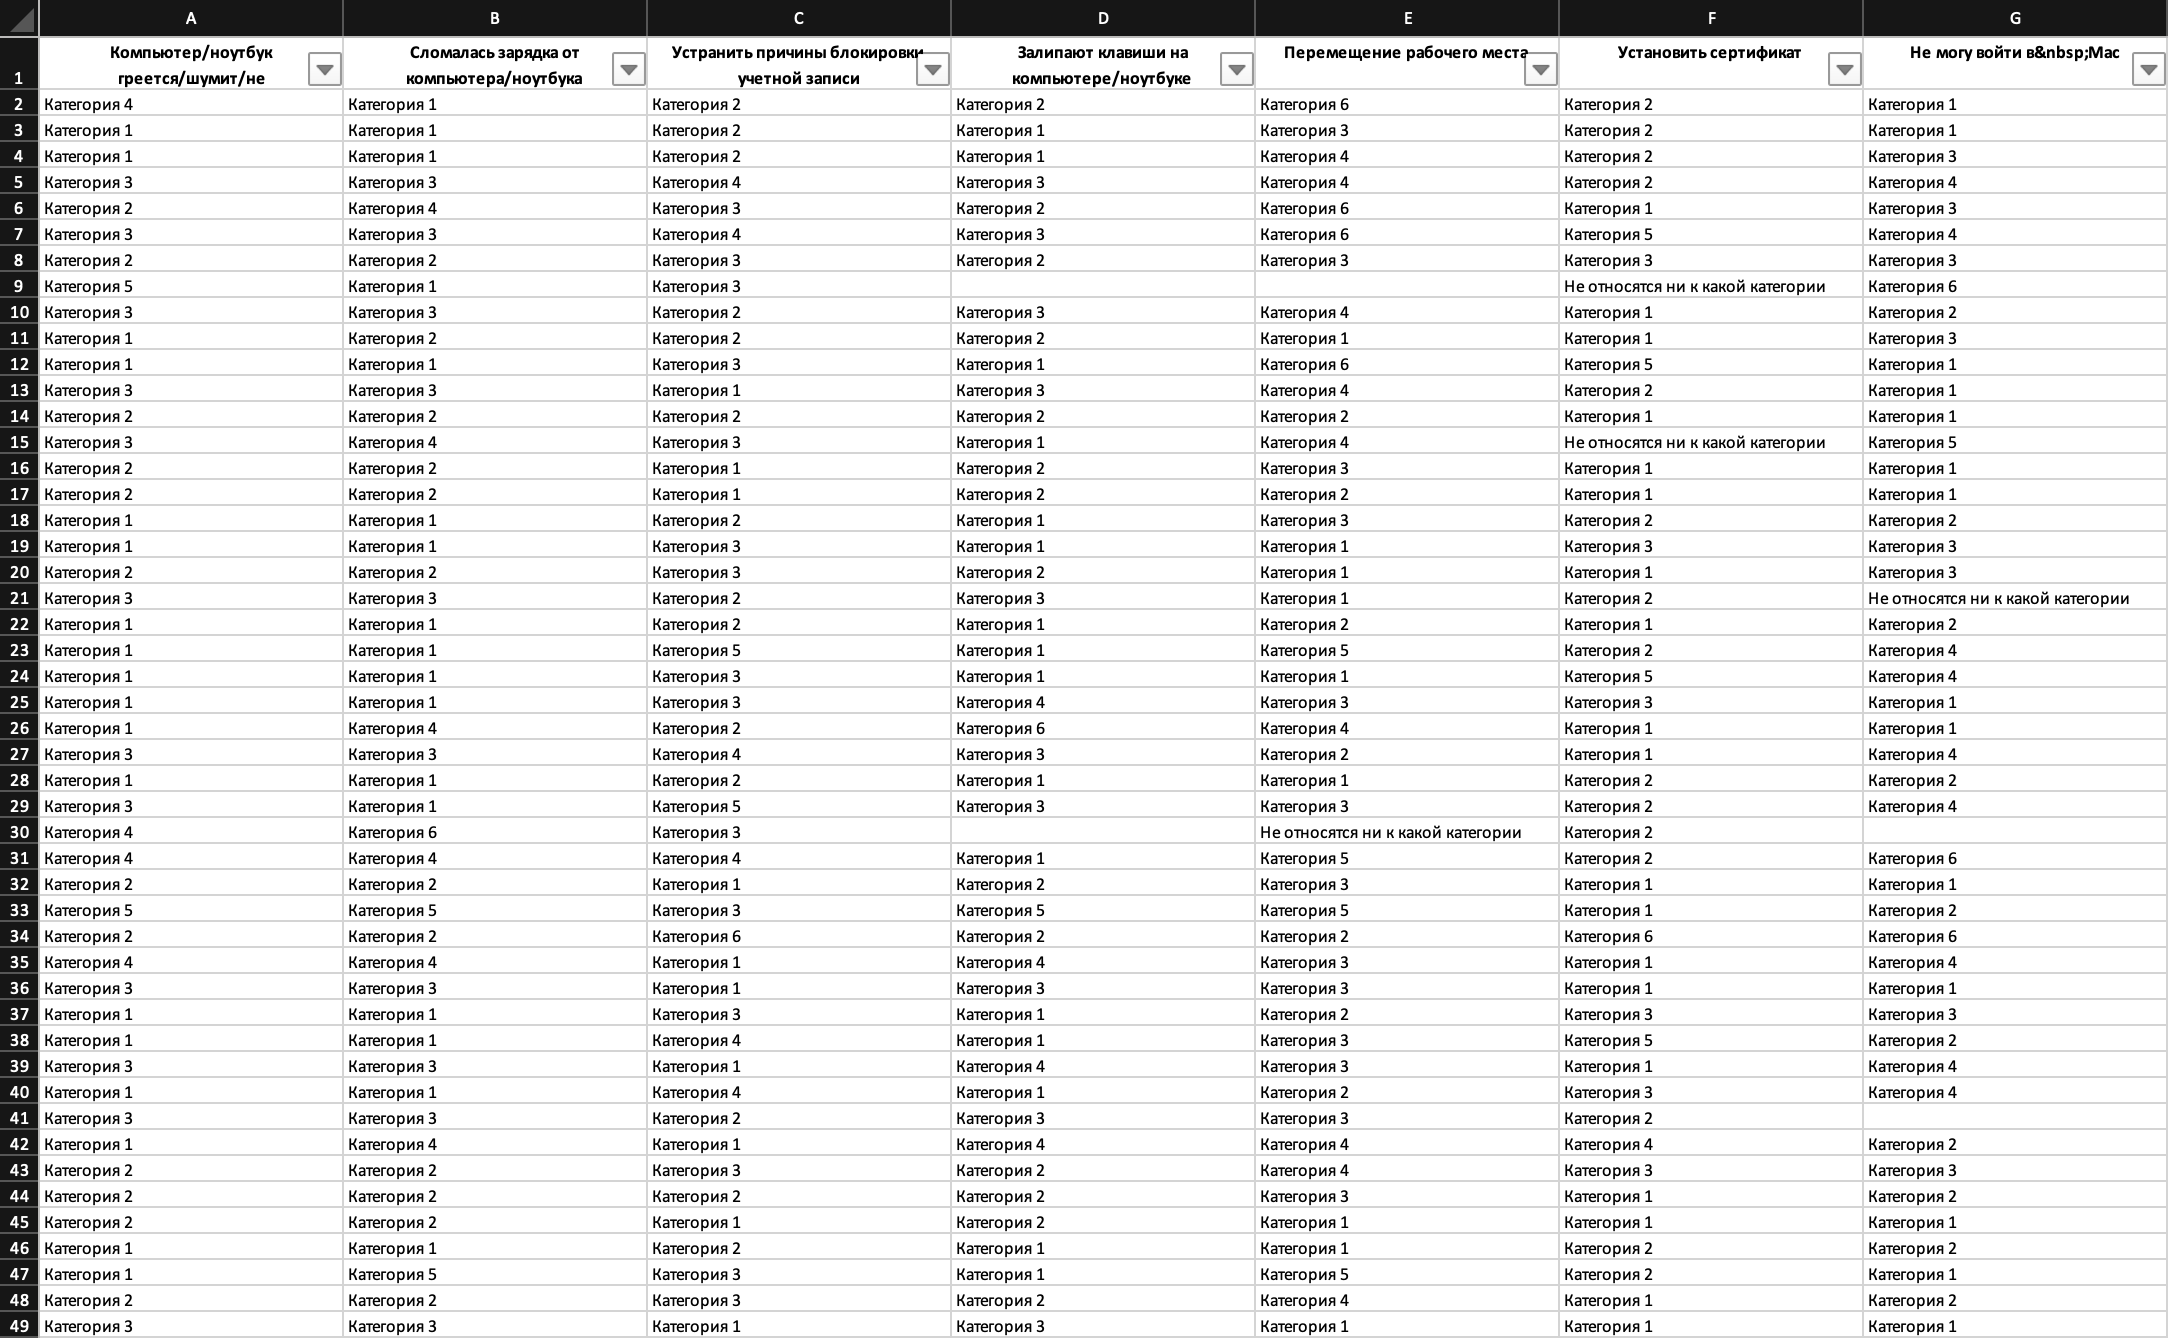

# **Приступаем к анализу данных**

Импортируем нужные пакеты 

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltimport

Подгружаем таблицу, которую мы сделали ранее. Для этого перейдите в Файлы (слева сверху значок папки) -> Загрузить в сессионное хранилище. 

Имейте в виду, что через какое-то время сессия прерывается и файл нужно прикреплять заново.

Меняем название файла в кавычках *(tablename)* на имя вашего файла. 

In [ ]:
df = pd.read_excel('tablename.xlsx')

Проверим, подгрузилась ли таблица. После запуска следующей строки кода среда должна выдать вашу таблицу.

In [ ]:
df

Далее перебираем карточки, превращая их в первую колонку и строку для корректных результатов.

In [ ]:
col_names = df.columns

In [ ]:
col_names[0]

In [ ]:
d = {}
for i in range(0, len(col_names)):
    for j in range (0, len(col_names)):
        d[(col_names[i], col_names[j])] = 0

In [ ]:
d

In [ ]:
print(df['Компьютер/ноутбук греется/шумит/не включается/быстро разряжается'])

Просчитываем количество пересечений карточек между собой.

In [ ]:
for k1, k2 in d:
    for i in range(146):
        if k1 != k2:
            if df[k1][i] == df[k2][i]:
                d[(k1, k2)] += 1
    if d[(k1, k2)] == 146:
        d[(k1, k2)] = 0

In [ ]:
print(d)

In [ ]:
print(df['Компьютер/ноутбук греется/шумит/не включается/быстро разряжается'][0])

In [ ]:
for k1, k2 in d:
    print(d[(k1, k2)])
    break

In [ ]:
df1 = pd.DataFrame(col_names)

In [ ]:
for i in range(len(col_names)):
    df1[col_names[i]] = col_names

In [ ]:
df1.index = df1[0].values

In [ ]:
for i in range(len(col_names)):
    for j in range(len(col_names)):
        df1[col_names[i]][col_names[j]] = d[(col_names[i], col_names[j])]

In [ ]:
df1

In [ ]:
del df1[0]

При запуске следующего блока среда должна выдать корректную таблицу пересечений с количественным указанием того, сколько раз каждые две карточки попадали в одну категорию.

In [ ]:
df1

Осталось выгрузить таблицу в формат .xlsx

In [ ]:
df1.to_excel("output.xlsx") 

Снова откройте Файлы (слева сверху, значок папки), там через пару минут должен появиться файл с названием output.xslx, нажмите на три точки рядом с ним, сохраните на компьютер.

С программированием закончили, приведем таблицу в показательный вид в Excel.

При открытии сохраненной таблицы вы увидите следующее:

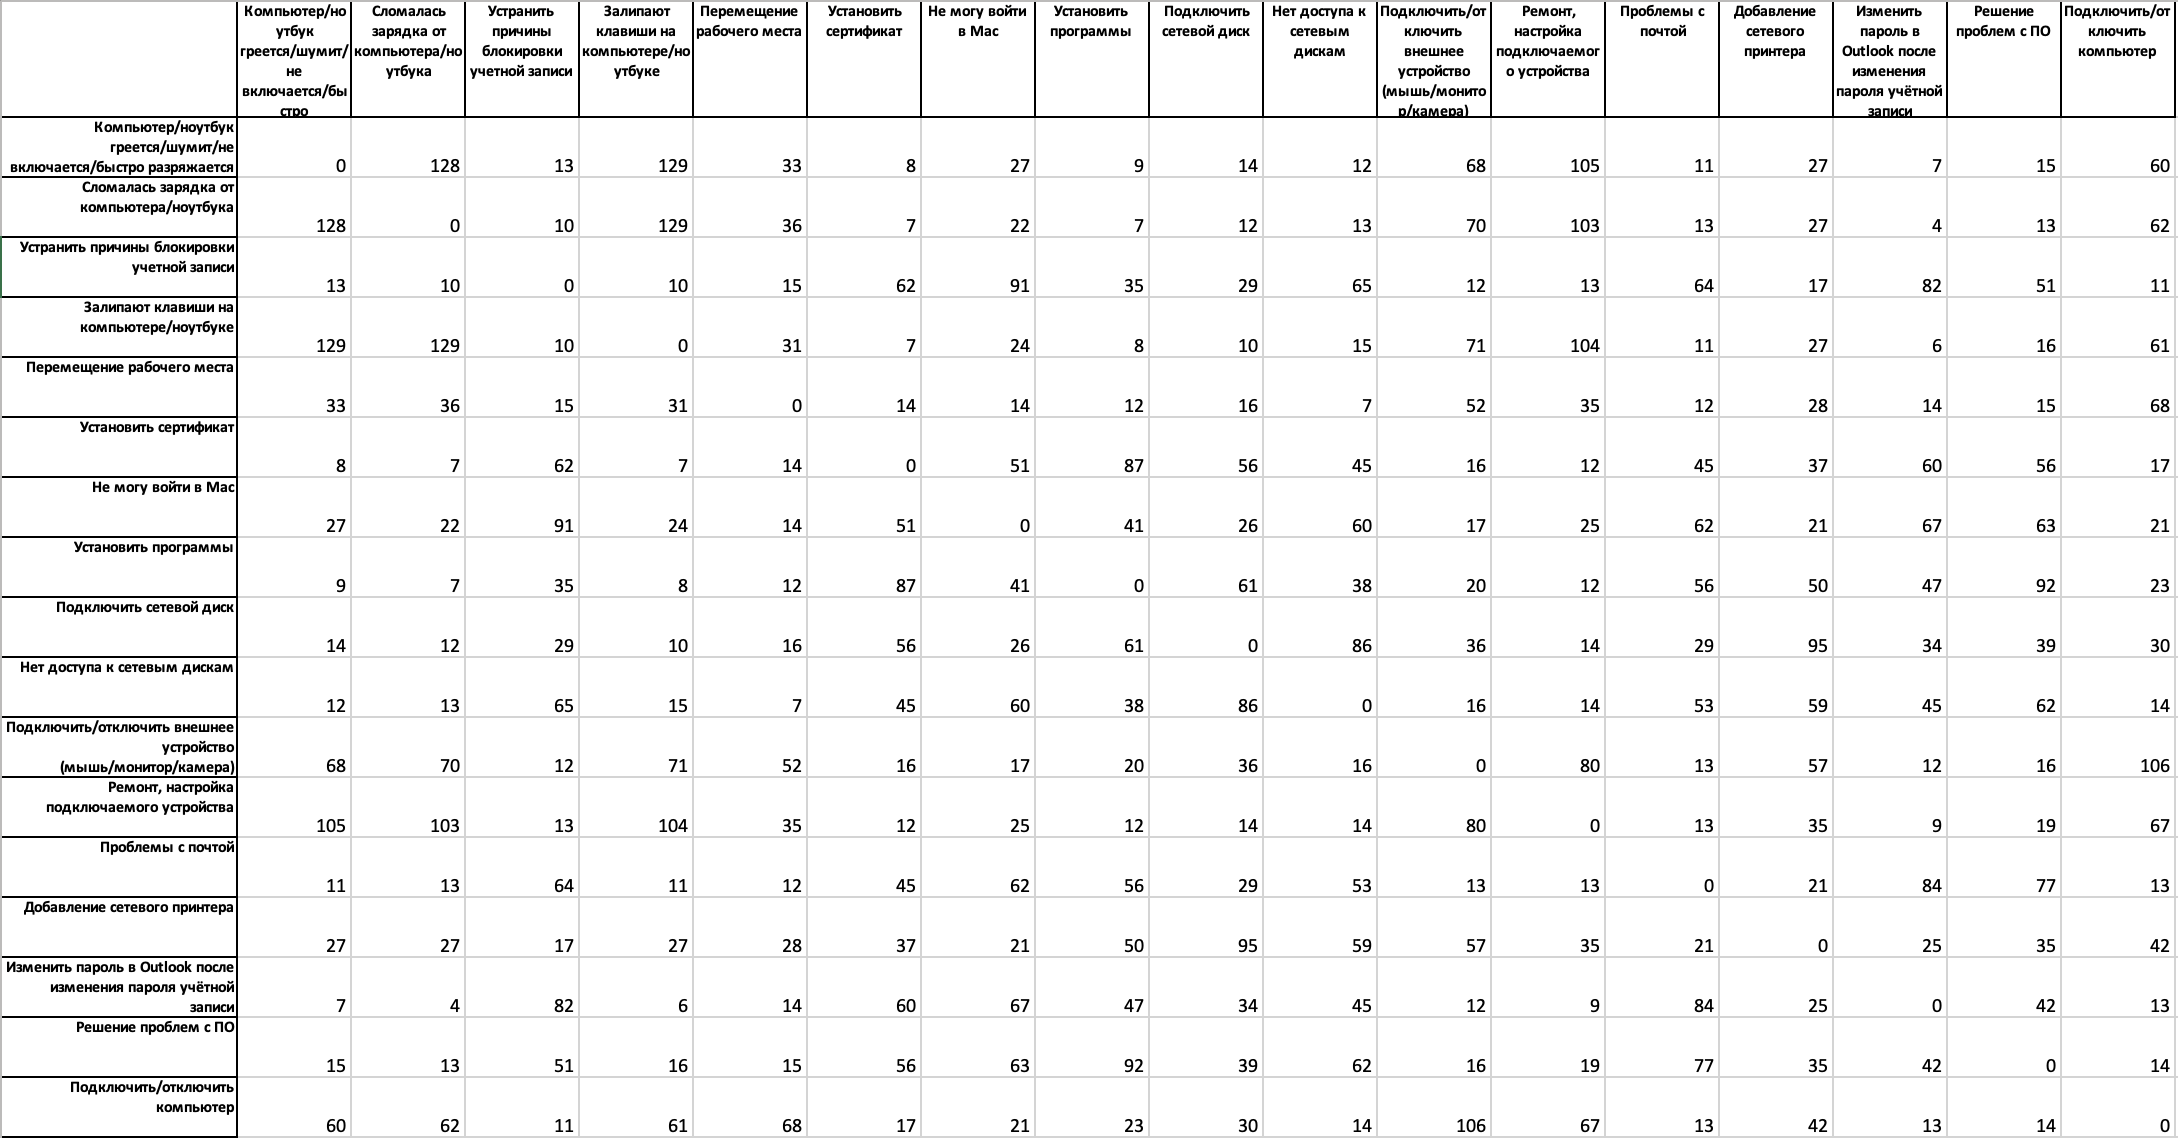

Чтобы нашему мозгу было легче воспринимать полученные результаты, покрасим таблицу, используя условное форматирование Excel. Для этого нужно выделить область таблицы, заполненную цифрами, на вкладке *Главная* нажать *Условное форматирование*, затем *Цветовые шкалы*, выбрать первый вариант. 

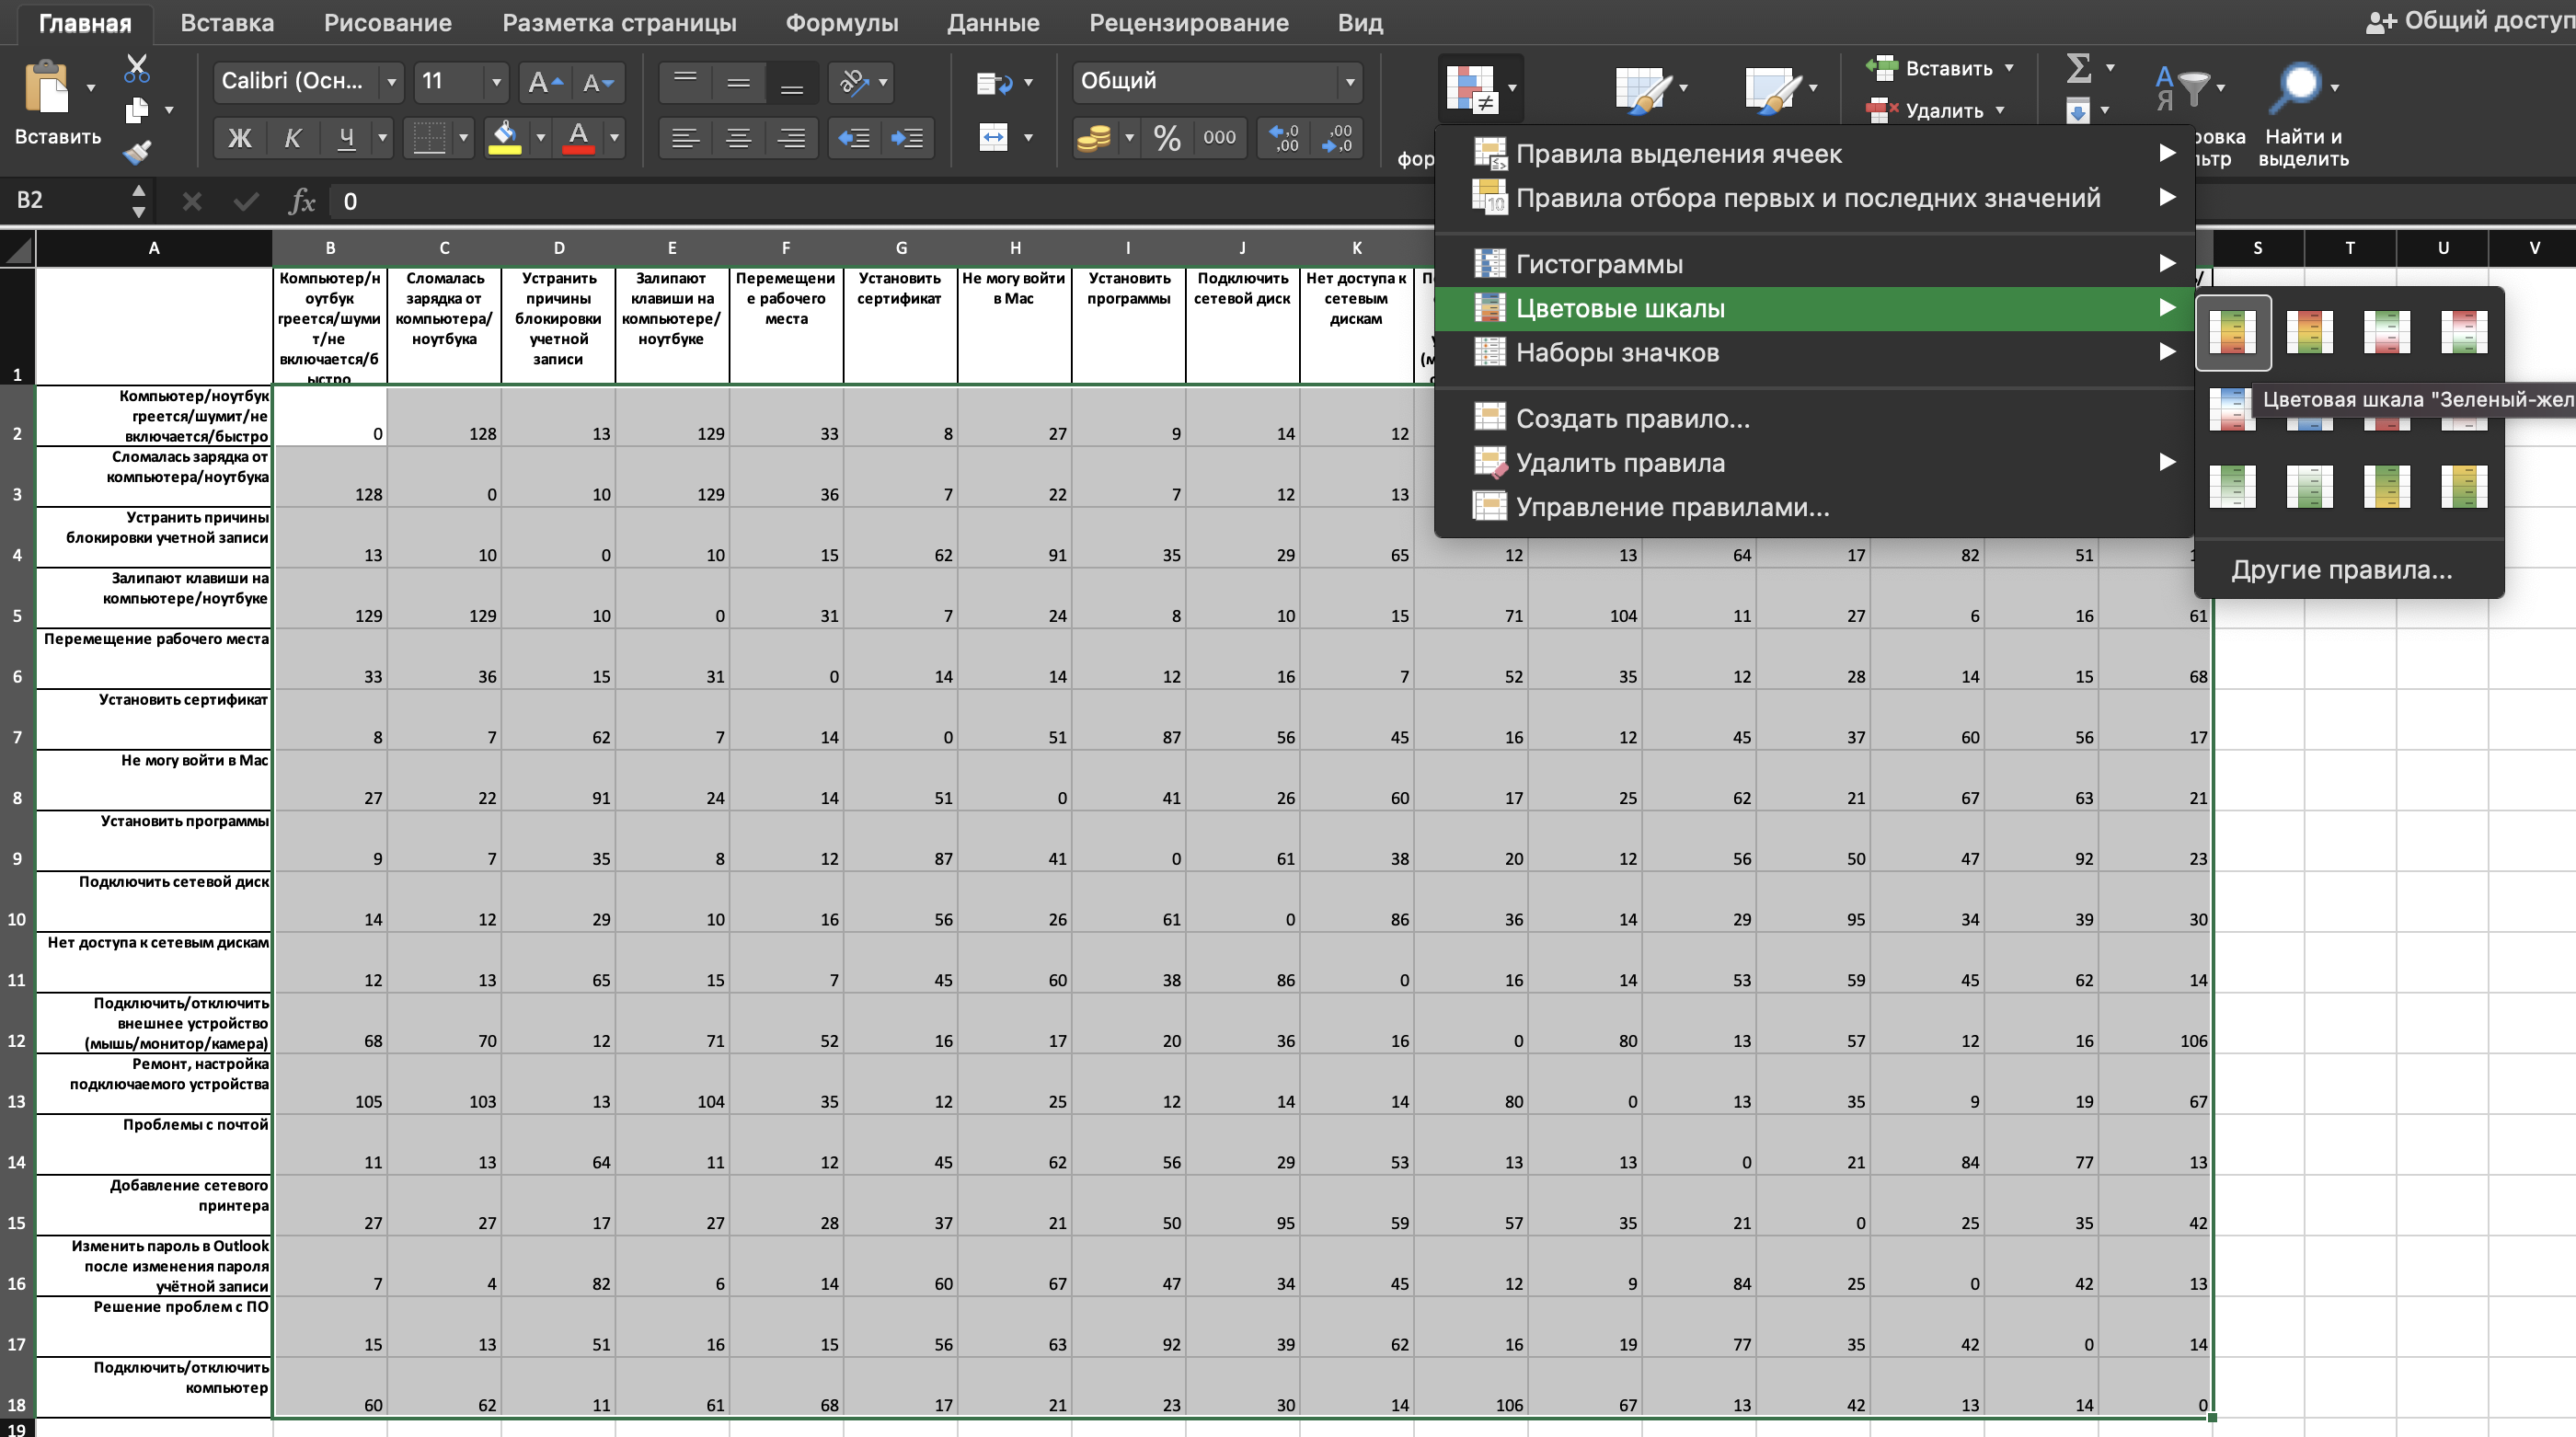

## **Готово!**



Вуа-ля, табличка теперь наглядно показывает количество пересечений. Чем зеленее ячейка, тем чаще две карточки встречались в одной группе. Исходя из этого можно формировать группы и превращать карточки в юзер-френдли каталог.

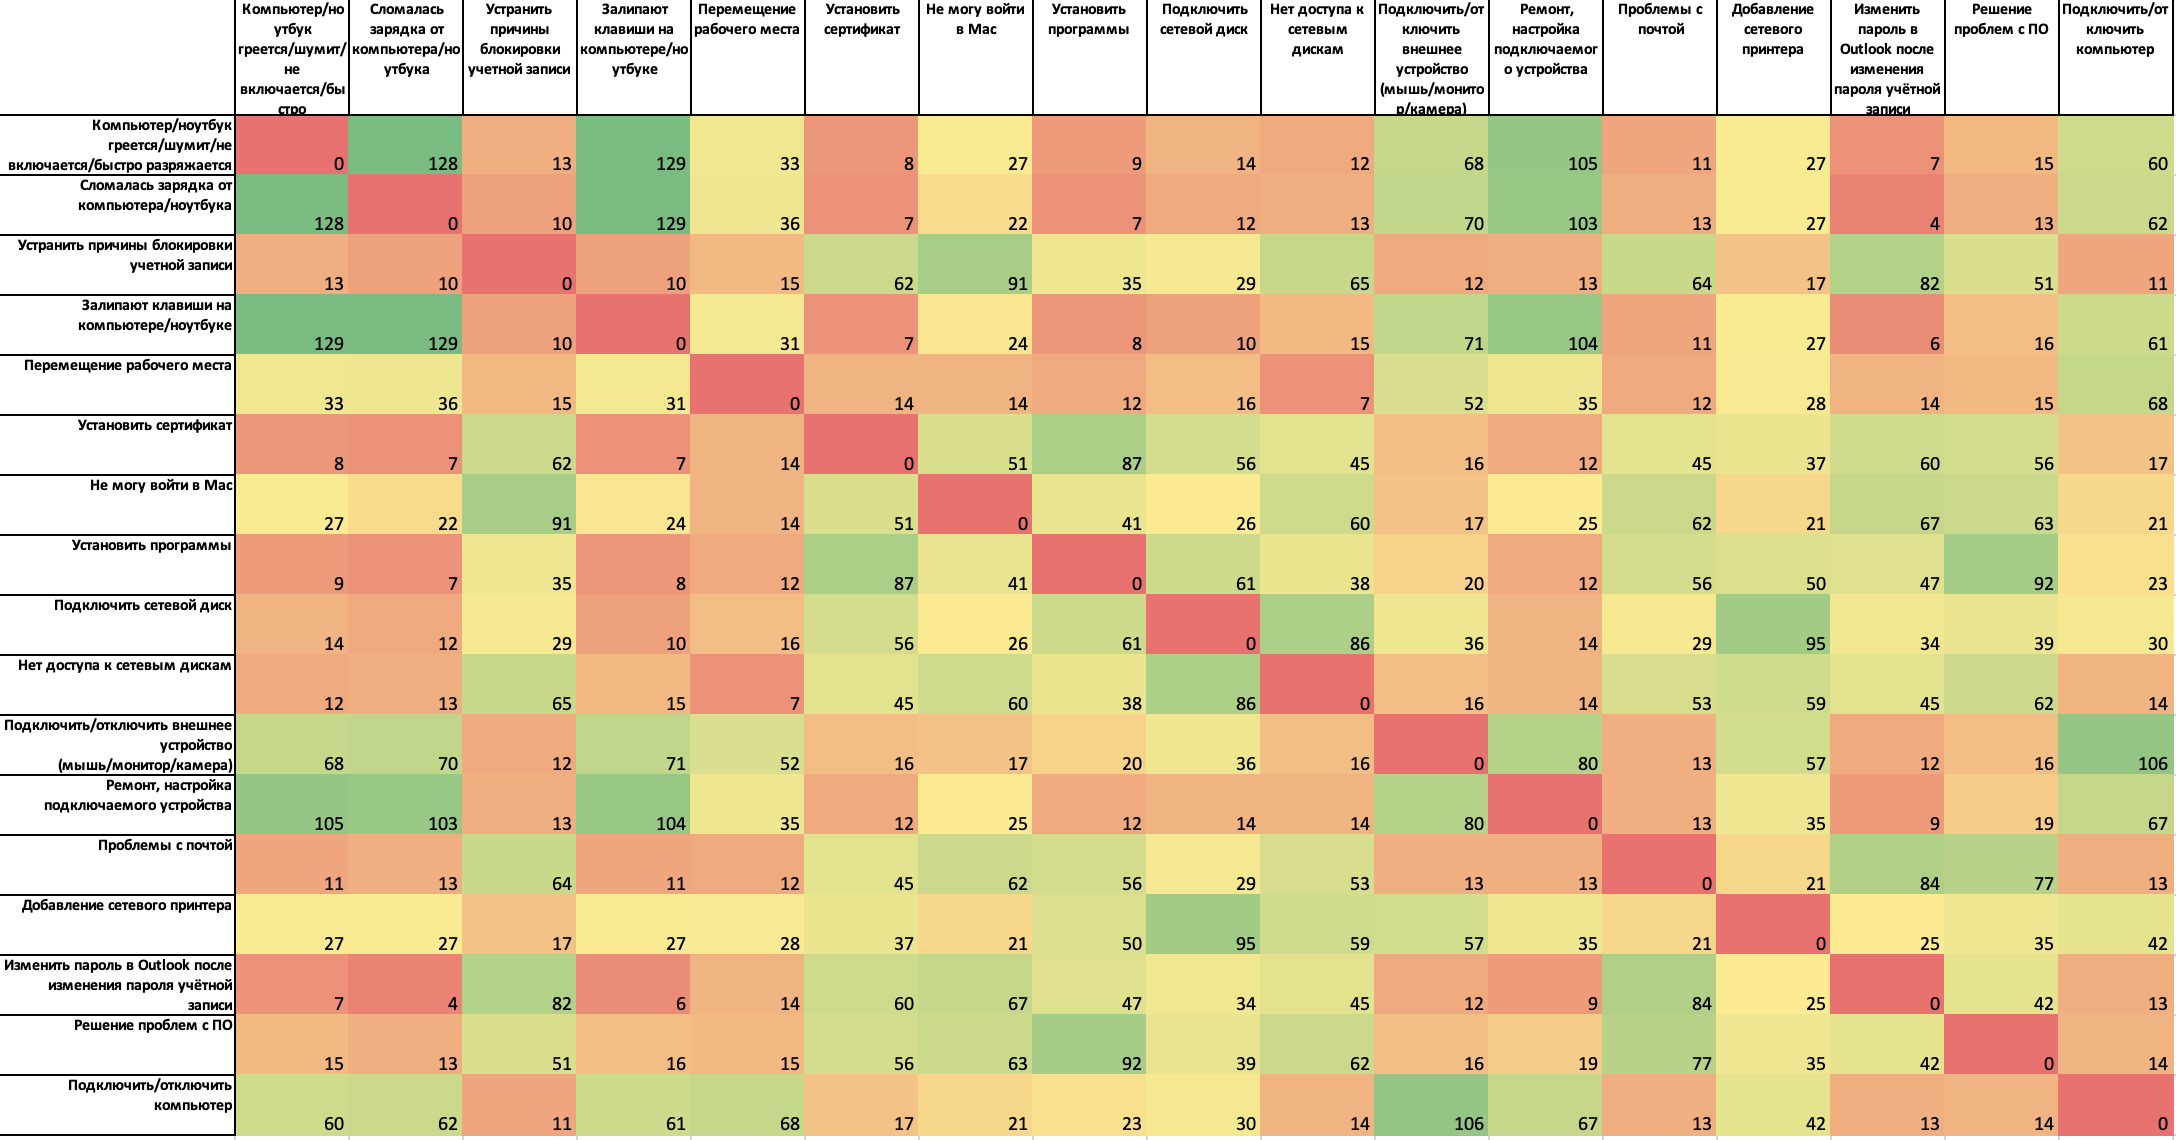

# **Названия категорий**

Для чего же был вопрос про названия категорий и что мы можем с ним сделать? Полезно, конечно, просмотреть его вручную, но мы также можем составить облако слов, которое поможет проверить частотность. Для этого снова открываем таблицу с полученными результатами опроса, оставляем только столбец с ответом на вопрос про названия категорий.

Для того, чтобы код сработал корректно, стоит также переименовать первую строку этого столбца в top

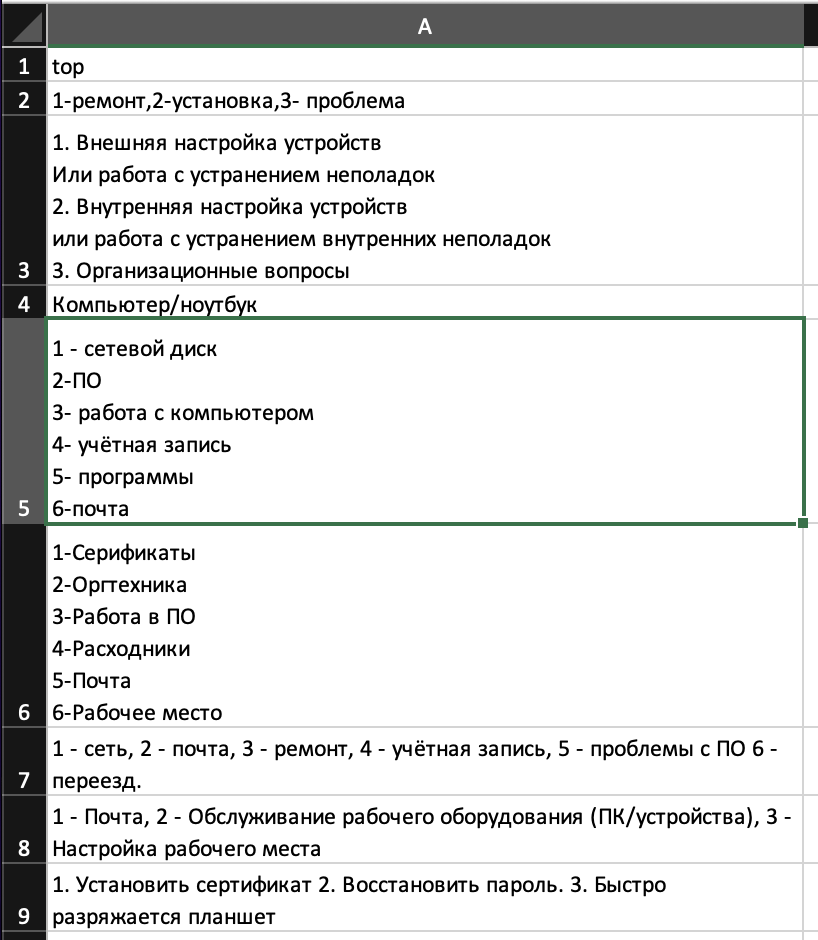

Итак, таблица должна состоять из одного столбца с ответами респондентов на вопрос про названия категорий с первой строкой 'top'.

Далее снова играемся с кодом. Подгружаем новую таблицу в Файлы, как мы делали до этого. В следующей строке с кодом меняем название *table2name* на название вашей таблицы.

In [ ]:
df_cloud = pd.read_excel('table2name.xlsx')

Проверяем, верно ли подгрузилась таблица.

In [ ]:
df_cloud

Объединяем ответы в один текстовый массив.

In [ ]:
text = ' '.join(df_cloud['top'])

Делаем визуализацию облака. Параметры можно менять, например, colormap отвечает за цвет, stopwords - слова (чаще служебные части речи - предлоги, союзы), которые мы удаляем, чтобы они не мешали и не портили картину, background_color - цвет фона.

plt.title - поменять заголовок и его размер, цвет, шрифт
plt.savefig - сохраняет картинку в Файлы среды

In [ ]:
from wordcloud import WordCloud
from matplotlib.pyplot import figure

stopwords = ['и', 'с', 'в', 'к', 'на']

cloud = WordCloud(scale = 3, max_words=150,
                      colormap='summer',
                      stopwords=stopwords,
                      background_color='white',
                      collocations = True).generate(text)
plt.imshow(cloud)
plt.axis('off')
plt.title('MacOS', fontsize=20)
plt.savefig("output1", bbox_inches='tight', transparent = True, dpi = 300)

## **Готово!**

Получилось облако слов, которое можно использовать для выявления тенденций в ответах респондентов. 

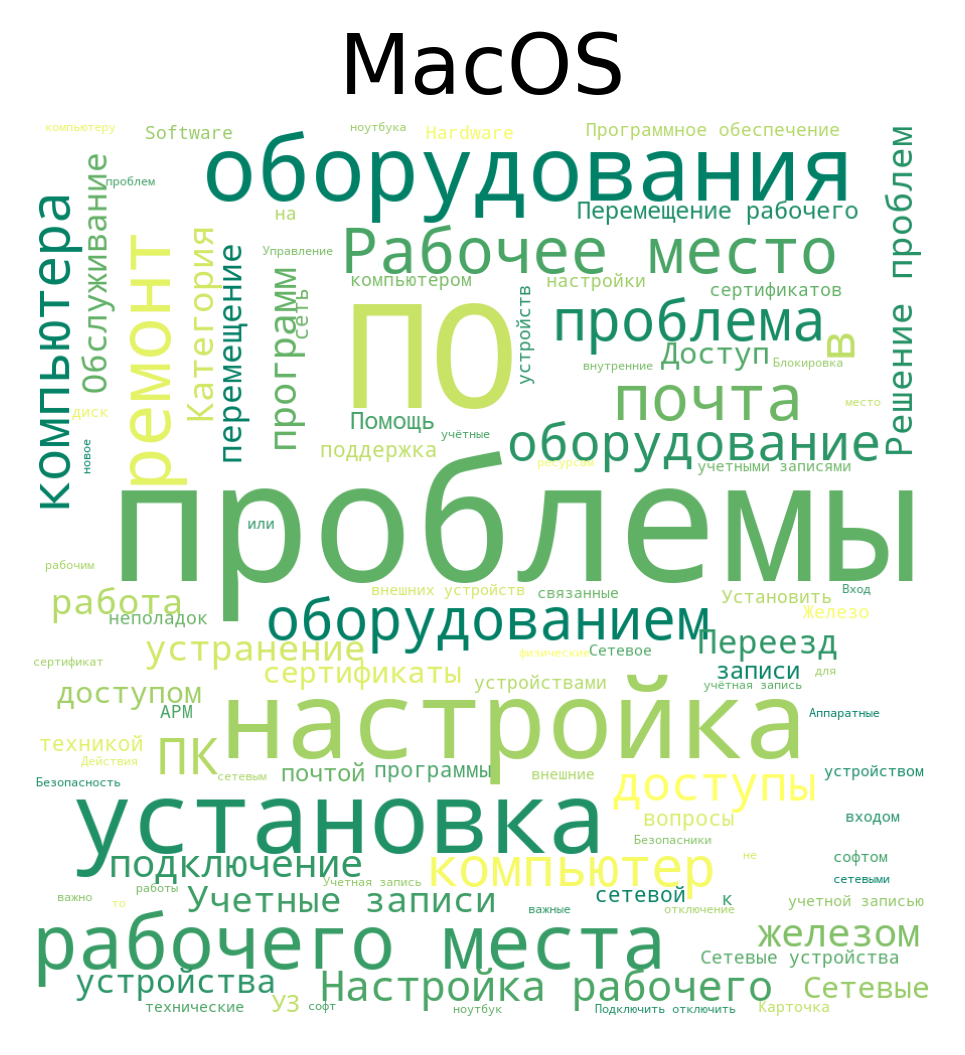

*Гайд составила Татьяна Чечельницкая, UX-исследователь SberUser*

*Задать вопрос или предложить улучшения можно в телеграм @inwiitari*